In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-03-04 18:45:05.176037: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 18:45:05.176134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 18:45:05.284978: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train.head()
test.head()
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train['label'].unique())
print(train['label'].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


In [7]:
x_train= train.iloc[:,1:]
y_train= train.iloc[:,:1]
x_test=test

In [8]:
x_train= x_train/255
x_test= x_test/255

x_train= x_train.values.reshape(-1,28,28,1)
x_test= x_test.values.reshape(-1,28,28,1)

num_classes= 10
y_train= tf.keras.utils.to_categorical(y_train, num_classes)

In [9]:
print(x_train.ndim)
print(x_test.ndim)
print(y_train.ndim)

4
4
2


In [10]:
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [11]:
print(y_train[0:5,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


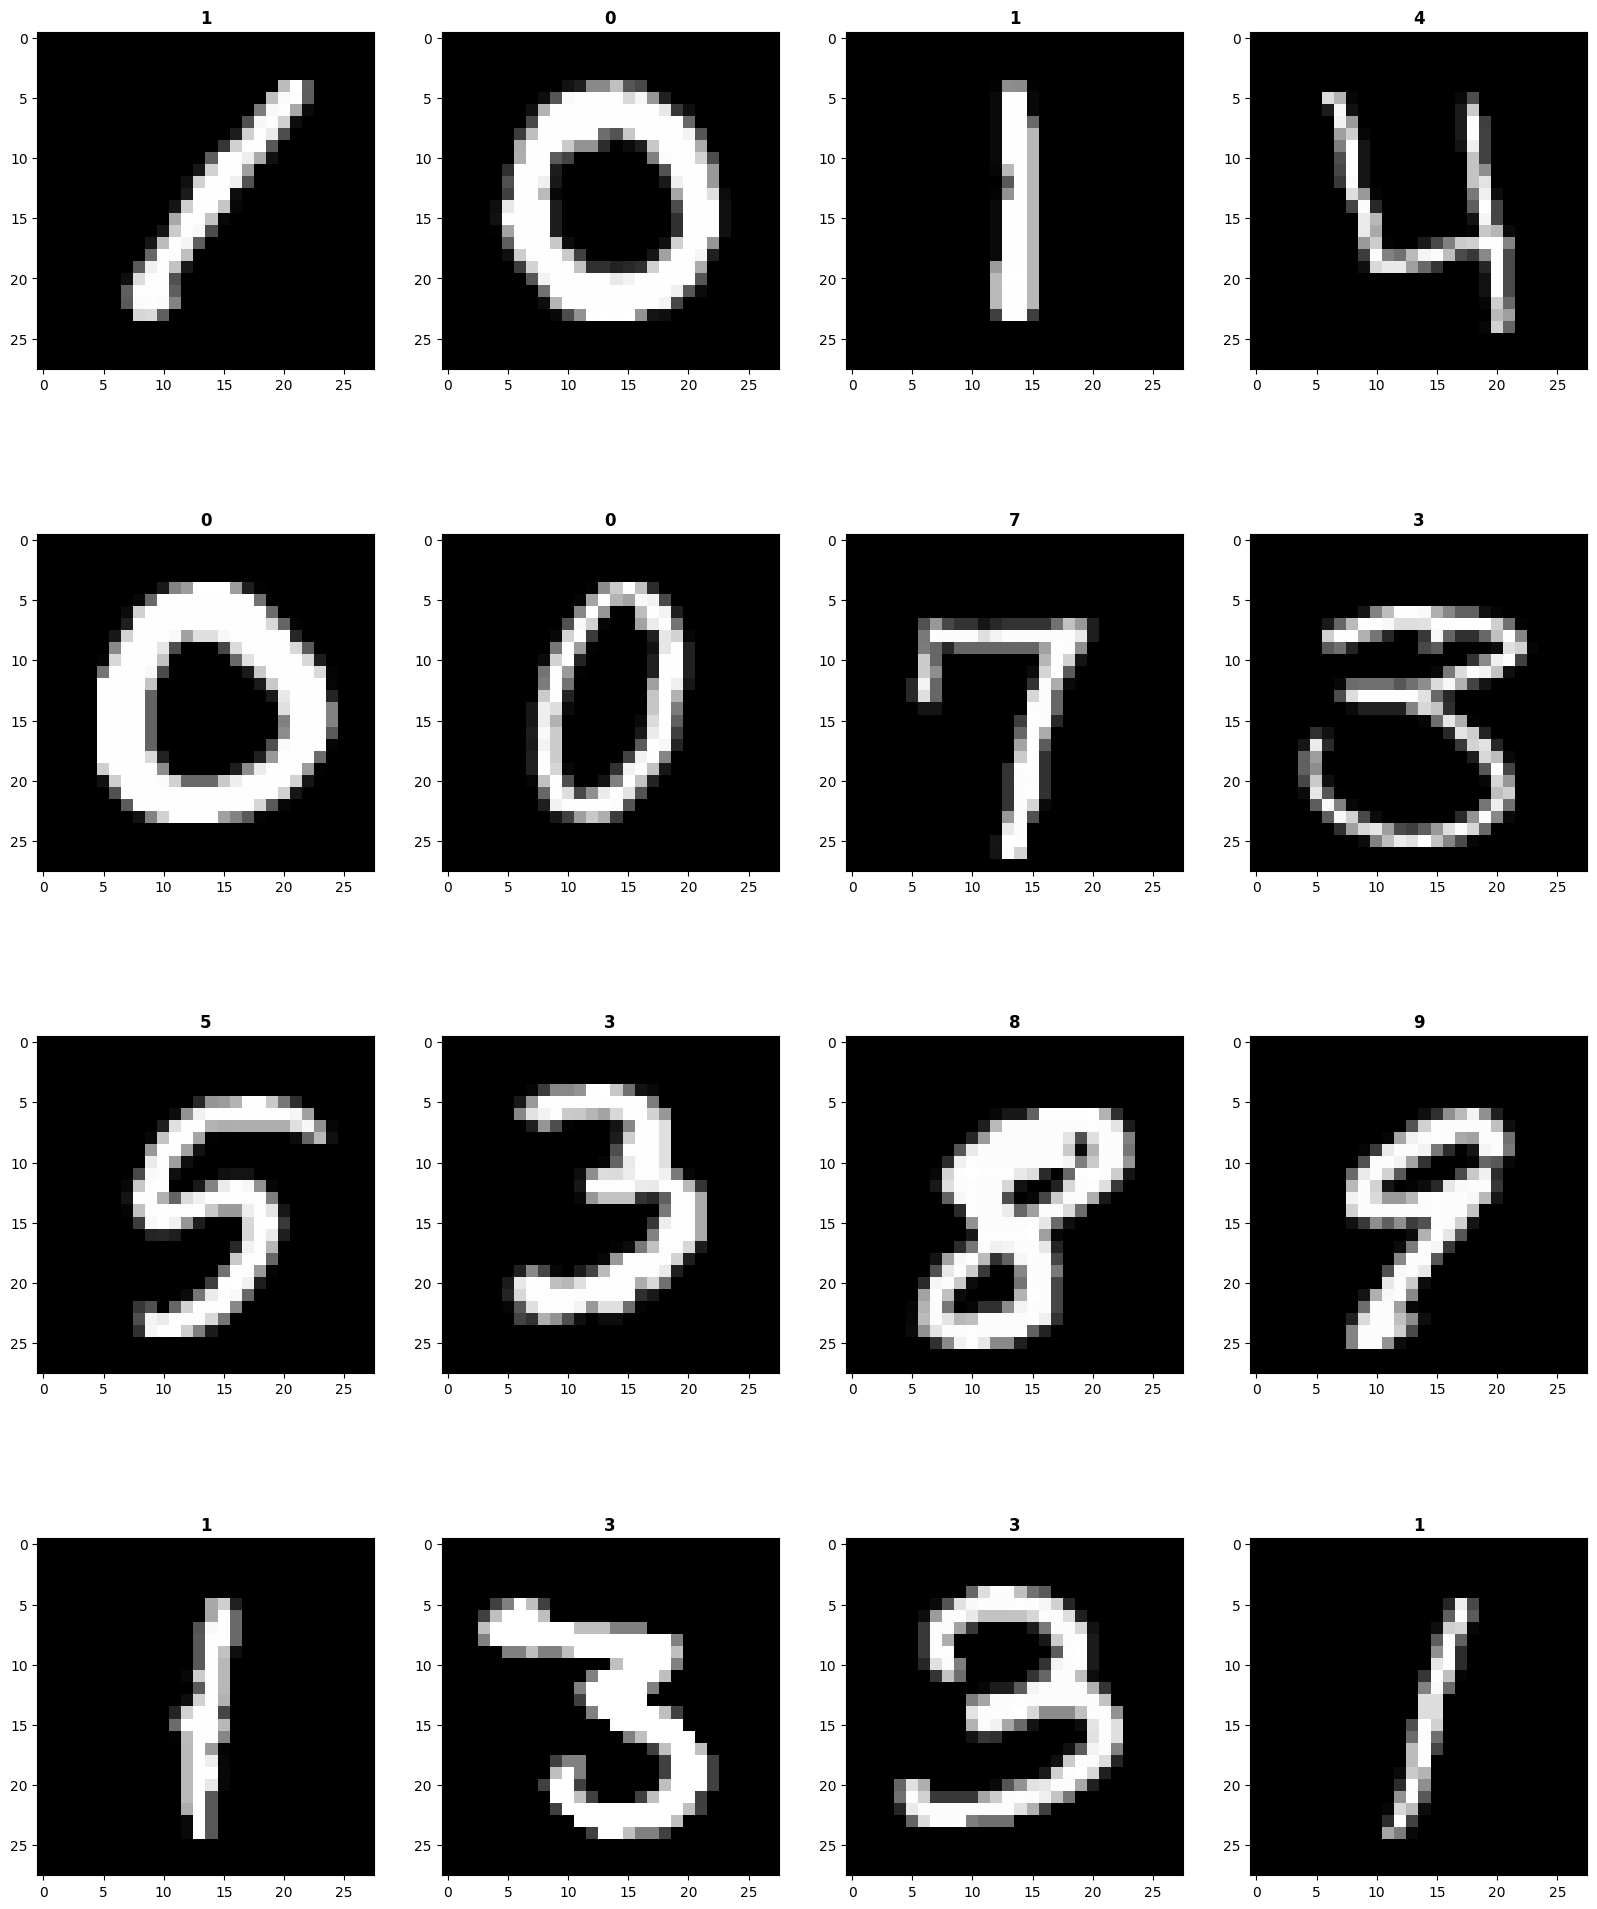

In [15]:
fig= plt.figure(figsize= (20,25))

for i in range(16):
    plt.subplot(4,4,1+i)
    plt.title(np.argmax(y_train[i]),fontname='Aptos',fontweight='bold')
    plt.imshow(x_train[i,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

In [22]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,922 (1.35 MB)

 Trainable params: 354,922 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
Optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
doing=model.fit(x_train, y_train, batch_size=256, epochs=69)

Epoch 1/69


2024-03-04 19:15:31.041409: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1352: 2.93084, expected 2.27177
2024-03-04 19:15:31.041462: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1353: 1.85559, expected 1.19652
2024-03-04 19:15:31.041472: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1354: 2.93168, expected 2.2726
2024-03-04 19:15:31.041480: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1355: 2.88152, expected 2.22245
2024-03-04 19:15:31.041487: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1356: 3.03374, expected 2.37467
2024-03-04 19:15:31.041496: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1357: 3.3851, expected 2.72603
2024-03-04 19:15:31.041503: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1358: 3.69715, expected 3.03808
2024-03-04 19:15:31.041511: E extern

 19/165 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1437 - loss: 2.2781

I0000 00:00:1709579736.202416    1697 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5488 - loss: 1.2791

2024-03-04 19:15:39.567382: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-03-04 19:15:39.567445: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-03-04 19:15:39.567455: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-03-04 19:15:39.567463: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-03-04 19:15:39.567471: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-03-04 19:15:39.567478: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-03-04 19:15:39.567486: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-03-04 19:15:39.567494: E external/local_xla/xla/ser

165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.5516 - loss: 1.2716
Epoch 2/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9530 - loss: 0.1515
Epoch 3/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9721 - loss: 0.0924
Epoch 4/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9769 - loss: 0.0758
Epoch 5/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9810 - loss: 0.0590
Epoch 6/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9853 - loss: 0.0460
Epoch 7/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9877 - loss: 0.0400
Epoch 8/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9880 - loss: 0.0388
Epoch 9/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9852 - loss: 0.0476
Epoch 10/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9912 - loss: 0.0277
Epoch 11/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9914 - loss: 0.0268
Epoch 12/69
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accura

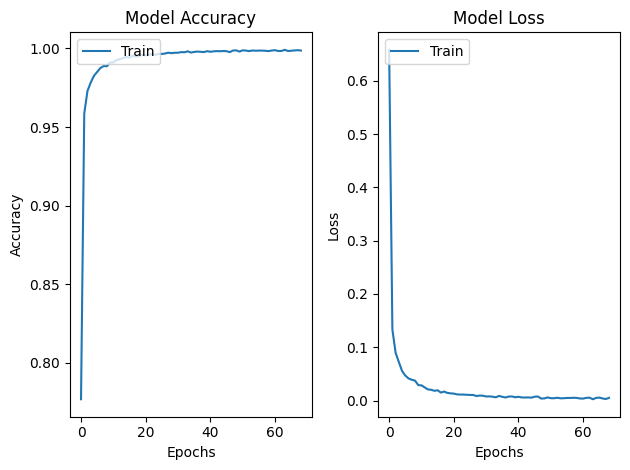

In [25]:
plt.subplot(1,2,1)
plt.plot(doing.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(["Train"],loc='upper left')

plt.subplot(1,2,2)
plt.plot(doing.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(["Train"],loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
result=model.predict(x_test)

result= np.argmax(result, axis=1)

result= pd.Series(result, name='Label')

2024-03-04 19:23:17.830882: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-03-04 19:23:17.830951: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-03-04 19:23:17.830960: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-03-04 19:23:17.830969: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-03-04 19:23:17.830976: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-03-04 19:23:17.830984: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-03-04 19:23:17.830992: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-03-04 19:23:17.830999: E external/local_xla/xla/se

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [27]:
print(result)

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [29]:
submission= pd.concat([pd.Series(range(1,28001), name="ImageId"),result],axis=1)
submission.to_csv("submission.csv",index=False)

In [30]:
submission=pd.read_csv('/kaggle/working/submission.csv')
print(submission.head())
print(submission.info())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB
None
